<img src="https://www.iscte-iul.pt/assets/images/logo_iscte_detailed.svg" style="width: 450px;margin-top:30px;" align ="center">

<div style= "font-size: 40px;  margin-top:40px; font-weight:bold; font-family: 'Avenir Next LT Pro', sans-serif;"><center>Statistical trading and Reinforcement Learning</center></div>
<div style= "font-size: 40px; font-weight:bold; font-family: 'Avenir Next LT Pro', sans-serif;"><center>algorithms of NVIDIA stock prices</center></div>

<div style= "font-size: 27px;font-weight:bold;line-height: 1.1; margin-top:40px; font-family: 'Avenir Next LT Pro', sans-serif;"><center>Otimização de Estratégias Orientadas por Dados 2024/2025</center></div> <br>

   <div style= "font-size: 20px;font-weight:bold; font-family: 'Avenir Next LT Pro', sans-serif;"><center> Grupo 7:</center></div>
   <div><center> Diogo Freitas | 104841 </center></div>
   <div><center> João Francisco Botas | 104782 </center></div>
   <div><center> Rebeca Sampaio |  126628 </center></div>

<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <style>
        body {
            font-family: Arial, sans-serif;
            background-color: #f4f4f4;
            color: #333;
            margin: 0;
            padding: 20px;
            line-height: 1.6;
        }
        ol {
            counter-reset: section;
            list-style: none;
            padding-left: 0;
        }
        /* First-level list */
        ol > li {
            counter-increment: section;
            margin-bottom: 10px;
            padding-left: 0;
        }
        ol > li::before {
            content: counters(section, ".") " ";
            font-weight: bold;
        }
        /* Second-level list */
        ol ol {
            counter-reset: subsection;
            padding-left: 20px;
            margin-top: 5px;
        }
        ol ol > li {
            counter-increment: subsection;
            margin-bottom: 5px;
            padding-left: 10px;
        }
        ol ol > li::before {
            content: counters(section, ".") "." counter(subsection) " ";
            font-weight: bold;
        }
        /* Third-level list */
        ol ol ol {
            counter-reset: subsubsection;
            padding-left: 40px;
            margin-top: 5px;
        }
        ol ol ol > li {
            counter-increment: subsubsection;
            margin-bottom: 5px;
            padding-left: 10px;
            font-size: 0.9em; /* Make font size smaller */
            font-weight: normal; /* Remove bold styling */
        }
        ol ol ol > li::before {
            content: counters(section, ".") "." counter(subsection) "." counter(subsubsection) " ";
            font-weight: bold;
        }
        a {
            text-decoration: none;
            color: #007BFF;
            font-weight: bold;
        }
        a:hover {
            color: #0056b3;
        }
        footer {
            margin-top: 50px;
        }
    </style>
</head>
<body>

<h2><b>Índice</b></h2>
<ol>
    <li><a href="#1">Bibliotecas para desenvolvimento do projeto</a></li>
    <li><a href="#2">Ticker Atribuído</a></li>
    <li><a href="#3">Extração de dados</a>
        <ol>
            <li><a href="#3.1">Transformação dos dados</a></li>
            <li><a href="#3.2">Estatísticas</a></li>
            <li><a href="#3.3">Gráficos úteis e Dashboard</a></li>
            <li><a href="#3.4">Cálculo das métricas</a></li>
                <ol>
                    <li><a href="#3.4.1">Retornos</a></li>
                    <li><a href="#3.4.2">Retornos médios esperados e risco</a></li>
                </ol>
        </ol>
    </li>
    <li><a href="#4">Estratégia Estatística de Trading</a>
        <ol>
            <li><a href="#4.1">Crossover de Média Móvel Exponencial (EMA)</a></li>
            <li><a href="#4.2">Modelo de Classificação (Machine Learning)</a></li>
        </ol>
    <li><a href="#5">Algoritmo de Reinforcement Learning de Trading</a>
        <ol>
            <li><a href="#5.1">Definição do environment</a></li>
            <li><a href="#5.2">Algoritmos de Q-learning:</a></li>
                <ol>
                    <li><a href="#5.2.1">Algoritmo 1</a></li>
                    <li><a href="#5.2.2">Algoritmo 2</a></li>
                </ol>
            <li><a href="#5.3">Fine-Tune Algoritmos</a></li>
        </ol>
</ol>

<footer></footer>

</body>
</html>

# <a class='anchor' id='1'></a>

> # **1. Bibliotecas para desenvolvimento do projeto** 

In [49]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
# import talib as ta
import quantstats as qs
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split, RandomizedSearchCV, TimeSeriesSplit, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, mean_squared_error, mean_absolute_error, r2_score, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from xgboost.sklearn import XGBClassifier
from tqdm import tqdm
import plotly.graph_objects as go
import mplfinance as mpf
from backtesting import Backtest, Strategy
import gymnasium as gym
from itertools import product
import gym_anytrading
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
import random

\# Executar este comando na `powershell` para instalar as packages necessárias para elaboração do projeto
```powershell
pip install -r requirements.txt
```

# <a class='anchor' id='2'></a>

> # **2. Ticker Atribuído** 

<div style="text-align: center;">
    <img src="https://th.bing.com/th/id/R.952ab16c7380e16b9f269e04481fabfc?rik=AXlfeVuBYRP54w&pid=ImgRaw&r=0" style="width: 170px; margin-top: 30px;">
</div>

Fundada em 1993, a NVIDIA é uma empresa reconhecida como líder global em tecnologia de computação gráfica, inteligência artificial e soluções de computação acelerada. Desde o lançamento da sua primeira unidade de processamento gráfico (GPU) em 1999, a empresa transformou setores como entretenimento digital, ciência, saúde e automobilismo, posicionando-se como um dos principais impulsionadores da inovação tecnológica no século XXI. Nos últimos anos, a NVIDIA tem se destacado não apenas pela inovação tecnológica, mas também pelo bom desempenho no mercado financeiro, com o valor das suas ações, registando aumentos significativos. Esse crescimento está diretamente relacionado à forte expansão das GPUs de alto desempenho, fundamentais para os domínios da Inteligência Artificial, Cloud Computing e Machine Learning, além do papel essencial da empresa no desenvolvimento de soluções para dataStatsStats centers e tecnologias de ponta.

Este projeto tem como objetivo implementar estratégias estatíticas de trading e treinar um agente de Reinforcement Learning que aprenda a evolução dos stocks da NVIDIA entre o período homólogo de 2019 a 2024. Este agente autonomamente e indiretamente irá tentar perceber as razões por trás do aumento dos seus stocks; a adoção crescente de inteligência artificial nos diversos setores da indústria; as estratégias empresariais; os desafios enfrentados num cenário de constante evolução tecnológica e competitiva.

**NOTA**: Como foi mencionado, irão ser extraídos os dados entre 2019 e 2024, mas mais concretamente de dia 1 de janeiro de 2019 e 31 de outubro de 2024, data de atribuição do enunciado do projeto.

# <a class='anchor' id='3'></a>

> # **3. Extração de dados** 

In [2]:
ticker = "NVDA"
start_date = "2019-01-01" # Não há dia 1 de janeiro de 2019...
end_date = "2024-11-01" # para incluir também o dia 31 de outubro de 2024
data = yf.download(ticker, start=start_date, end=end_date)

[*********************100%***********************]  1 of 1 completed


In [3]:
data.info()
data

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1469 entries, 2019-01-02 to 2024-10-31
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Adj Close, NVDA)  1469 non-null   float64
 1   (Close, NVDA)      1469 non-null   float64
 2   (High, NVDA)       1469 non-null   float64
 3   (Low, NVDA)        1469 non-null   float64
 4   (Open, NVDA)       1469 non-null   float64
 5   (Volume, NVDA)     1469 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 80.3 KB


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,NVDA,NVDA,NVDA,NVDA,NVDA,NVDA
Date,,,,,,
2019-01-02,3.378090,3.405500,3.462000,3.251250,3.266000,508752000
2019-01-03,3.173996,3.199750,3.379000,3.192250,3.344750,705552000
2019-01-04,3.377346,3.404750,3.443250,3.242500,3.273500,585620000
2019-01-07,3.556145,3.585000,3.622250,3.410750,3.462500,709160000
2019-01-08,3.467613,3.495750,3.669500,3.422500,3.667250,786016000
...,...,...,...,...,...,...
2024-10-25,141.530243,141.539993,144.130005,140.800003,140.929993,205122100
2024-10-28,140.510315,140.520004,143.139999,140.050003,143.000000,173586700


# <a class='anchor' id='3.1'></a>

> ## **3.1 Transformação de dados**

In [4]:
# see nulls in data
data.isnull().sum()

Price      Ticker
Adj Close  NVDA      0
Close      NVDA      0
High       NVDA      0
Low        NVDA      0
Open       NVDA      0
Volume     NVDA      0
dtype: int64

Após descarregarmos os dados no período indicado, verificamos que não há valores omissos nos 1468 dias/entradas do dataset. Vemos a existência de variavéis que correspondem a:

1. **Date**  
   - Representa a data da observação dos preços históricos (varia entre 01-01-2019 e 31-10-2024);

2. **Adj Close** (Adjusted Close)  
   - O preço ajustado de "fecho" da ação, considerando eventos como dividendos, splits e outras ações corporativas que afetam o valor da ação;

3. **Close**  
   - O preço de "fecho" da ação no final do dia, sem ajustes para eventos corporativos;

4. **High**  
   - O preço mais alto alcançado pela ação durante o dia;

5. **Low**  
   - O preço mais baixo alcançado pela ação durante o dia;

6. **Open**  
   - O preço inicial da ação no início do dia;

7. **Volume**  
   - O número total de ações negociadas durante o dia.

In [5]:
# transformar a data do indice 0para datetime e mostrar só até ao dia (sem horas)
data.index = pd.to_datetime(data.index)
data.index = data.index.strftime('%Y-%m-%d')
data = data.reset_index() # retira-se o index para poder usar a data como coluna

In [6]:
# retirar o MultiIndex das colunas (sempre NVDA e Ticker)
if isinstance(data.columns, pd.MultiIndex):
    data.columns = [' '.join(map(str, col)).strip() for col in data.columns]
data.columns = [col.replace(f"{ticker}", "").replace("Ticker", "").strip() for col in data.columns]
data

,Date,Adj Close,Close,High,Low,Open,Volume
0,2019-01-02,3.378090,3.405500,3.462000,3.251250,3.266000,508752000
1,2019-01-03,3.173996,3.199750,3.379000,3.192250,3.344750,705552000
2,2019-01-04,3.377346,3.404750,3.443250,3.242500,3.273500,585620000
3,2019-01-07,3.556145,3.585000,3.622250,3.410750,3.462500,709160000
4,2019-01-08,3.467613,3.495750,3.669500,3.422500,3.667250,786016000
...,...,...,...,...,...,...,...
1464,2024-10-25,141.530243,141.539993,144.130005,140.800003,140.929993,205122100
1465,2024-10-28,140.510315,140.520004,143.139999,140.050003,143.000000,173586700
1466,2024-10-29,141.240265,141.250000,142.259995,138.899994,140.289993,157593600
1467,2024-10-30,139.330399,139.339996,140.330002,136.809998,139.539993,179418100


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1469 entries, 0 to 1468
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1469 non-null   object 
 1   Adj Close  1469 non-null   float64
 2   Close      1469 non-null   float64
 3   High       1469 non-null   float64
 4   Low        1469 non-null   float64
 5   Open       1469 non-null   float64
 6   Volume     1469 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 80.5+ KB


# <a class='anchor' id='3.2'></a>

> ## **3.2 Estatísticas** 

In [8]:
# Copiar os dados originais
dataStats = data.copy()

# Configurar o Pandas para não usar notação científica e formatar os números com 2 casas decimais
pd.options.display.float_format = '{:.6f}'.format

# Converter a coluna 'Date' para o formato datetime
dataStats['Date'] = pd.to_datetime(dataStats['Date'])

# Adicionar a coluna de ano
dataStats['Year'] = dataStats['Date'].dt.year

# Cálculo das métricas anuais
annual_stats = dataStats.groupby('Year').agg(
    avg_price=('Adj Close', 'mean'),
    max_high=('High', 'max'),  # Máximo anual de High
    min_low=('Low', 'min'),  # Mínimo anual de Low
    avg_volume=('Volume', 'mean'),
    first_close=('Adj Close', 'first'),
    last_close=('Adj Close', 'last')
)

# Cálculo do Retorno Anual (%) 
annual_stats['annual_return_pct'] = (annual_stats['last_close'] - annual_stats['first_close']) / annual_stats['first_close'] * 100

# Cálculo da Volatilidade Anual dos Retornos (Desvio Padrão dos Retornos Diários)
dataStats['daily_return'] = dataStats['Adj Close'].pct_change()

# Cálculo do número de dias de negociação (dias úteis)
annual_stats['trading_days'] = dataStats.groupby('Year')['Date'].apply(lambda x: pd.bdate_range(start=x.min(), end=x.max()).size)

# Calcular a volatilidade usando trading_days
annual_stats['volatility'] = dataStats.groupby('Year')['daily_return'].std() * np.sqrt(annual_stats['trading_days']) * 100  # Volatilidade em %

# Cálculo do número de dias com volume acima da média anual
annual_stats['days_above_avg_vol'] = dataStats.groupby('Year').apply(
    lambda x: (x['Volume'] > annual_stats.loc[x.name, 'avg_volume']).sum()
)

# Calcular a Tendência Linear (Slope) usando a data completa como eixo temporal
annual_stats['trend_slope'] = dataStats.groupby('Year').apply(
    lambda x: np.polyfit((x['Date'] - x['Date'].min()).dt.days, x['Adj Close'], 1)[0]
)

# Adicionar o símbolo de % nas variáveis que são percentuais
annual_stats['annual_return_pct'] = annual_stats['annual_return_pct'].apply(lambda x: f'{x:.2f}%')
annual_stats['volatility'] = annual_stats['volatility'].apply(lambda x: f'{x:.2f}%')

# Exibir o resultado com as colunas desejadas
annual_stats = annual_stats[['annual_return_pct', 'avg_price', 'max_high', 'min_low', 'avg_volume', 'volatility', 'trading_days', 'days_above_avg_vol', 'trend_slope']]

# Exibir o resultado
annual_stats

C:\Users\35196\AppData\Local\Temp\ipykernel_39836\314796113.py:36: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  annual_stats['days_above_avg_vol'] = dataStats.groupby('Year').apply(
C:\Users\35196\AppData\Local\Temp\ipykernel_39836\314796113.py:41: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  annual_stats['trend_slope'] = dataStats.groupby('Year').apply(


,annual_return_pct,avg_price,max_high,min_low,avg_volume,volatility,trading_days,days_above_avg_vol,trend_slope
Year,,,,,,,,,
2019,73.41%,4.338581,6.045250,3.192250,456399666.666667,41.29%,260,94,0.004417
2020,118.02%,9.859559,14.726750,4.517000,480855256.916996,58.84%,261,106,0.026562
2021,124.48%,19.483434,34.646999,11.566500,359558817.460317,45.70%,260,92,0.051868
2022,-51.44%,18.544185,30.711000,10.813000,543163223.107570,64.21%,260,111,-0.036685
2023,246.10%,36.552498,50.548000,14.034000,473557460.000000,49.10%,259,97,0.095347
2024,175.68%,101.594215,144.419998,47.320000,409995164.454976,51.30%,218,98,0.254817


C:\Users\35196\AppData\Local\Temp\ipykernel_39836\3252322321.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('vlag', len(dataStats['Year'].unique()))  # Paleta de cores mais suave para os anos


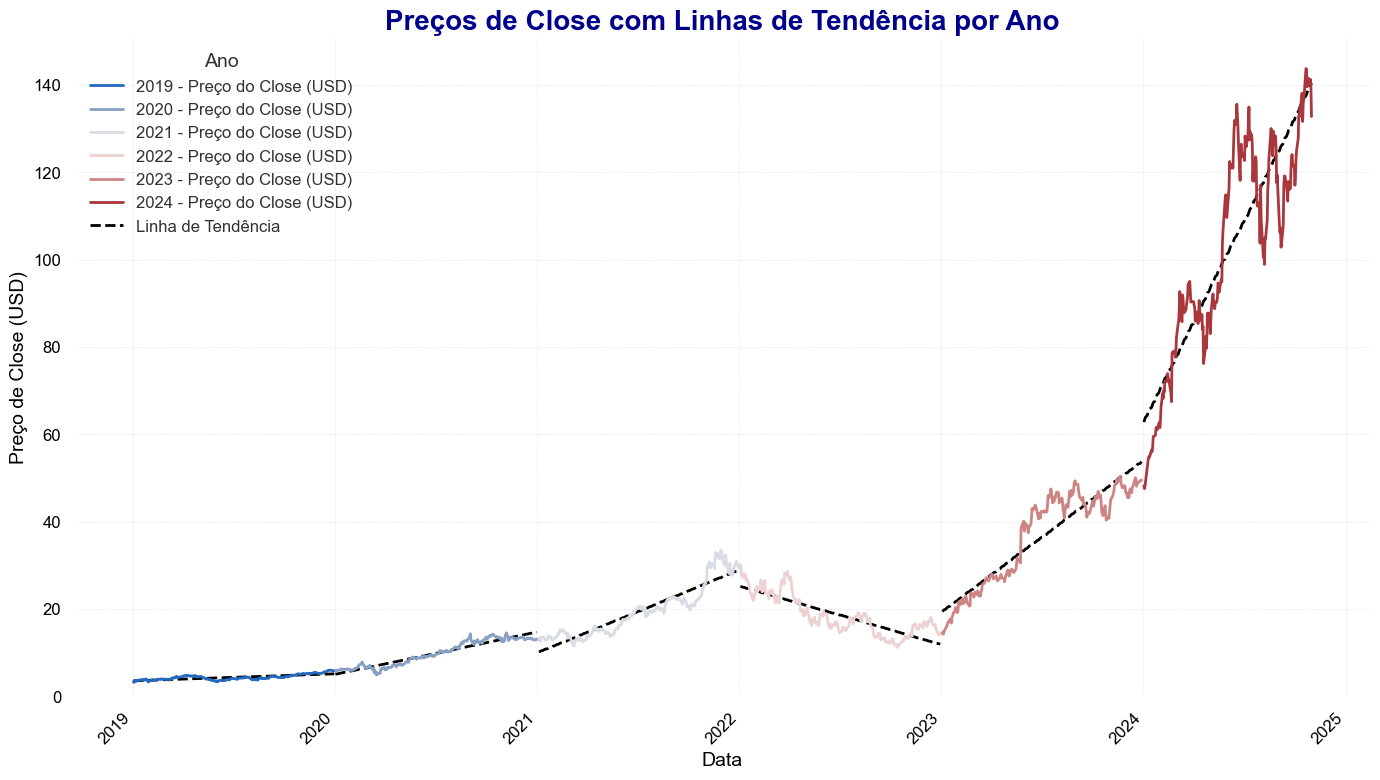

In [9]:
variavel = 'Close'

# Configurar o gráfico
plt.figure(figsize=(14, 8))

# Usar uma paleta de cores suave para as linhas de valores
colors = plt.cm.get_cmap('vlag', len(dataStats['Year'].unique()))  # Paleta de cores mais suave para os anos
unique_years = dataStats['Year'].unique()

# Plotar a linha contínua com cores suaves para os valores de fechamento
for i, year in enumerate(unique_years):
    year_data = dataStats[dataStats['Year'] == year]
    plt.plot(year_data['Date'], year_data[variavel], color=colors(i), label=f'{year} - Preço do {variavel} (USD)', linewidth=2, zorder=2)

# Calcular e adicionar linhas de tendência para cada ano
for i, year in enumerate(unique_years):
    year_data = dataStats[dataStats['Year'] == year]
    x = np.arange(len(year_data))  # Usar o índice como variável independente
    y = year_data[variavel].values
    # Regressão linear: y = mx + b
    m, b = np.polyfit(x, y, 1)  # Regressão linear
    trendline = m * x + b
    # Linha de tendência em preto e mais espessa para destacar
    plt.plot(year_data['Date'], trendline, '--', color='black', linewidth=2, zorder=1, label='Linha de Tendência' if i == 0 else "")

# Configurar o título e rótulos com um design mais limpo
plt.title(f'Preços de {variavel} com Linhas de Tendência por Ano', fontsize=20, fontweight='bold', color='darkblue')
plt.xlabel('Data', fontsize=14, color='black')
plt.ylabel(f'Preço de {variavel} (USD)', fontsize=14, color='black')

# Melhorar o formato do eixo X (datas)
plt.xticks(rotation=45, ha='right', fontsize=12, color='black')
plt.yticks(fontsize=12, color='black')

# Ajustar o limite do eixo Y para uma visualização mais limpa
plt.ylim(bottom=0)  # Definir limite inferior do eixo Y para 0 (evitar valores negativos)

# Adicionar uma grade leve e sutil
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.6, zorder=0)

# Ajustar a legenda: separar a legenda de linhas de tendência e de valores, dentro do gráfico
plt.legend(title='Ano', title_fontsize=14, fontsize=12, loc='upper left', frameon=False)

# Exibir o gráfico com layout ajustado
plt.tight_layout()  # Ajuste automático do layout para evitar sobreposição de elementos
plt.show()

In [10]:
del annual_stats, dataStats

# <a class='anchor' id='3.3'></a>

> ## **3.3 Gráficos úteis e Dashboard** 

Visualização de um gráfico com o matplotlib de High e Low com área entre os dois para ver flutuações mais evidentes.

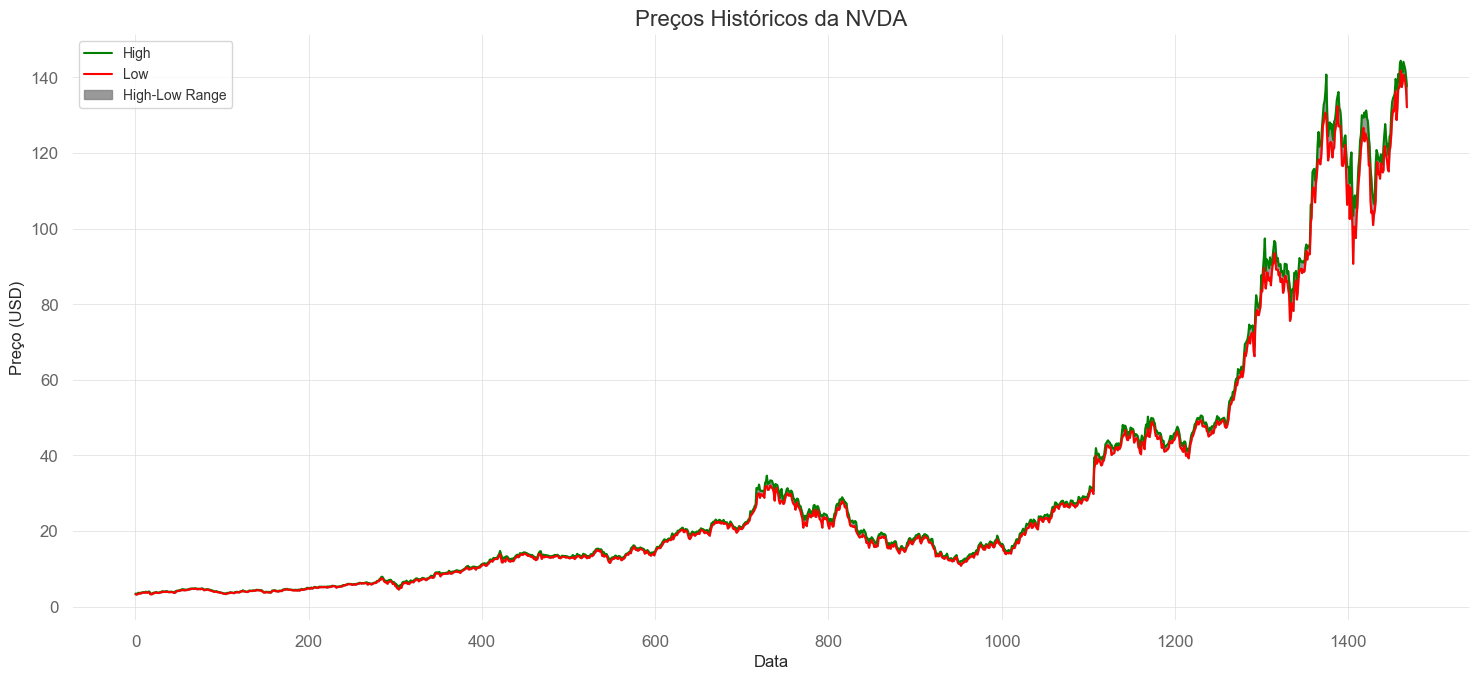

In [11]:
plt.figure(figsize=(15, 7))

# plt.plot(data.index, data['Adj Close'], label="Adj Close", color='blue')
# plt.plot(data.index, data['Close'], label="Close", color='orange')

# mostra apenas os dias de 1 a 1468 (2019-01-02 a 2024-10-31)
plt.plot(data.index, data['High'], label="High", color='green')
plt.plot(data.index, data['Low'], label="Low", color='red')
plt.fill_between(data.index, data['High'], data['Low'], color='grey', alpha=0.8, label='High-Low Range')

plt.title(f"Preços Históricos da {ticker}", fontsize=16)
plt.xlabel("Data", fontsize=12)
plt.ylabel("Preço (USD)", fontsize=12)
plt.legend(loc='upper left', fontsize=10)


# Exibir gráfico
plt.tight_layout()
plt.show()

Gráfico OHLC com plotly para ter uma interatividade a mais nas colunas apresentadas.

Foi inspirado nos links seguintes:
- https://plotly.com/python/ohlc-charts/
- https://dash.plotly.com/tutorial?utm_medium=graphing_libraries&utm_content=python_footer&_gl=1 (ver como se faz)


In [12]:
# TODO: ver este gráfico melhor

fig = go.Figure(data=go.Ohlc(x=data['Date'],
                open=data['Open'],
                high=data['High'],
                low=data['Low'],
                close=data['Close']))
fig.update(layout_xaxis_rangeslider_visible=False)

fig.update_layout(
    title=dict(text=f'Gráfico OHLC da {ticker}'),
    yaxis=dict(title=dict(text='Preço (USD)')),
    # shapes = [dict(
    #    x0='2023-05-25', x1='2023-05-25', y0=0, y1=1, xref='x', yref='paper',
    #    line_width=2)],
    #annotations=[dict(
    #    x='2023-05-25', y=0.05, xref='x', yref='paper',
    #    showarrow=False, xanchor='left', text='AI Chip announcement')]
)

fig.show()

Foi realizado um dashboard que mostra algumas visualizações interativas dos stocks da NVIDIA para o período específico.

Esse ficheiro encontra-se em (assumindo que estamos em .\OEOD\notebooks):

```powershell
cd ..
cd .\src\
python dashboard_OEOD-Grupo7.py
```

# <a class='anchor' id='3.4'></a>

> ## **3.4. Cálculo das métricas** 

# <a class='anchor' id='3.4.1'></a>

> ### **3.4.1 Retornos** 

Taxa de return entre o dia anterior e presente.

Transforma-se a Data em index outra vez para podermos ter uma referência mais correta da data e do retorno nesse dia versus dia anterior.

In [13]:
pd.options.display.float_format = '{:.20f}'.format
log = False

if log:
    datalog = data[data["Close"] > 0].dropna(subset=["Close"])
    # Retorno logarítmico
    returns = np.log(datalog["Close"] / datalog["Close"].shift(1))
    datause = datalog.copy()
else:
    # Retorno simples
    returns = data["Close"].pct_change() # mudar o intervalo de datas para não ter omissos maybe; está FEITO mas ter cuidado!!!
    datause = data.copy()

# Calcular a soma e a média dos retornos diários
returns_sum = returns.sum()
returns_mean = returns.mean()

# Exibir os resultados
print(f'Soma dos retornos diários: {returns_sum}')
print(f'Média dos retornos diários: {returns_mean}')
print(f'Asset Expected Return: {returns_mean / len(datause):.40f}')

Soma dos retornos diários: 4.457202894137319
Média dos retornos diários: 0.0030362417534995365
Asset Expected Return: 0.0000020668766191283433391256366823407475


# <a class='anchor' id='3.4.2'></a>

> ### **3.4.2 Retornos médios esperados e risco** 

In [14]:
# daily risk free rate
rf = (1.02 ** (1/360))-1
# Calculate volatilities , expected returns and sharpe ratios.
volatility = returns.std() # volatility
exp_returns = returns.mean() # expected returns
sr = (exp_returns-rf)/volatility # Sharpe ratio

print(f"O return esperado é de: {exp_returns}")
print(f"O risco é de: {volatility}")
print(f"O Sharpe ratio é de: {sr}")

O return esperado é de: 0.0030362417534995365
O risco é de: 0.0329278427427735
O Sharpe ratio é de: 0.09053836189070488


<div style="font-size: 13px;">

| Métrica               | Fórmula                           | Valor          | Explicação                                                                                 |
|-----------------------|------------------------------------|----------------|-------------------------------------------------------------------------------------------|
| **Taxa Livre de Risco (rf)** | $rf = (1 + 0.02)^{\frac{1}{360}} - 1$ | `5.50088e-05` | Taxa de return diário sem risco, assumindo uma taxa anual de 2% e ajustada para 360 dias úteis. |
| **Volatilidade**       | $\sigma = \text{std}(\text{returns})$ | `0.032928`        | O desvio padrão dos returns diários, que indica a variabilidade ou risco do ativo.       |
| **Return Esperado**   | $\mu = \text{mean}(\text{returns})$ | `0.003036`        | A média dos returns diários, ou seja, o return esperado do ativo.                |
| **Sharpe Ratio (sr)**  | $SR = \frac{\mu - rf}{\sigma}$ | `0.090538`        | Medida de return ajustado ao risco, calculada como o excesso do return dividido pela volatilidade. |

</div>


In [15]:
# define function that compute CAGR
def cagr(start_value , end_value , num_periods):
    return (end_value / start_value) ** (1 / (num_periods - 1)) - 1
# example
start_value = float(datause["Close"].iloc[0])
end_value = float(datause["Close"].iloc[-1])
num_periods = len(datause["Close"])
result = cagr(start_value , end_value , num_periods)
print(f"CAGR: {result}")

CAGR: 0.0024984505386265177


# <a class='anchor' id='4'></a>

> # **4. Estratégia Estatística de Trading** 

In [16]:
data.set_index('Date', inplace=True)

# <a class='anchor' id='4.1'></a>

> ## **4.1 Crossover de Média Móvel Exponencial (EMA)** 

Foi utilizado este método porque o preço de NVIDIA cresceu exponencialmente no período estudado e também porque queremos dar mais destaque aos dados mais recentes do período indicado. Há razões externas que levam à subida dos stocks da NVIDIA.
Links úteis:
- Ver conceitos do método de Média Móvel Exponencial: https://www.investopedia.com/terms/e/ema.asp
- Ver função ewn() do pandas: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html
- Ver aplicabilidades deste método (mini revisão-literatura):
    + https://www.investopedia.com/terms/g/goldencross.asp
    + https://www.forexstrategieswork.com/exponential-moving-average-indicator-stay-on-the-right-side-of-the-trend-with-the-ema-indicator/

<div style="text-align: center;">
    <img src="https://natahbali.wordpress.com/wp-content/uploads/2012/01/ema.gif" style="width: 500px; margin-top: 30px;">
</div>

In [17]:
# copy data para não alterar o original!!
data_plus = data.copy()

span_fast = 20
span_slow = 140 # mudado de 200 para 150, resultados semelhantes (tmb com 130)

data_plus['EMA_Fast'] = data_plus['Close'].ewm(span=span_fast, adjust=False).mean() # pode ser ajustado entre 10 e 20
data_plus['EMA_Slow'] = data_plus['Close'].ewm(span=span_slow, adjust=False).mean() # TODO: pode-se ajustar isto entre 50 e 200

# PÓS-REUNIÃO: colocar no slow 150, 170, etc.

# estrategia de crossover
data_plus['Signal'] = np.where(data_plus['EMA_Fast'] > data_plus['EMA_Slow'], 1, 0) # 1 for buy, 0 for sell
data_plus['Position'] = data_plus['Signal'].diff()


data_plus['Crossover'] = None # começa vetor de nulos
data_plus['Crossover'] = np.where(
    (data_plus['EMA_Fast'] > data_plus['EMA_Slow']) & (data_plus['EMA_Fast'].shift(1) <= data_plus['EMA_Slow'].shift(1)),
    'fast_above',
    np.where(
        (data_plus['EMA_Slow'] > data_plus['EMA_Fast']) & (data_plus['EMA_Slow'].shift(1) <= data_plus['EMA_Fast'].shift(1)),
        'slow_above',
        None
    )
)
data_plus['Crossover'] = data_plus['Crossover'].astype('object')

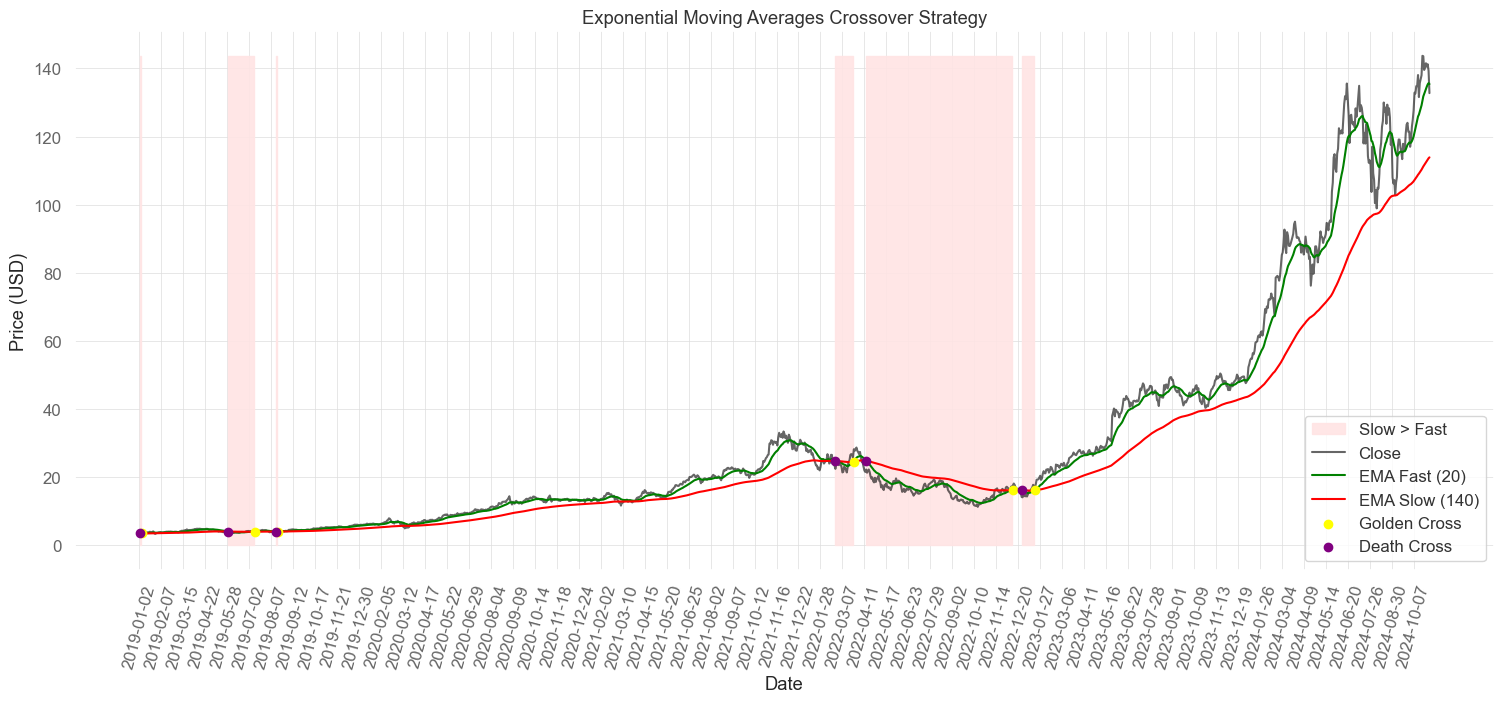

Cumulative Strategy Returns: 23.09


In [18]:
plt.figure(figsize=(15, 7))
'''
plt.fill_between(
    data_plus.index,
    data_plus['Close'].min(),
    data_plus['Close'].max(),
    where=data_plus['EMA_Fast'] > data_plus['EMA_Slow'],
    color='#E5FFE4',
    alpha=0.9,
    label='Fast > Slow'
)
'''
plt.fill_between(
    data_plus.index,
    0, data_plus['Close'].max(),
    where=data_plus['EMA_Slow'] > data_plus['EMA_Fast'],
    color='#FFE4E4',
    alpha=0.9,
    label='Slow > Fast'
)

########
plt.plot(data_plus['Close'], label="Close", color='black', alpha=0.6)
plt.plot(data_plus['EMA_Fast'], label=f"EMA Fast ({span_fast})", color='green')
plt.plot(data_plus['EMA_Slow'], label=f"EMA Slow ({span_slow})", color='red')
plt.scatter(
    data_plus.index[data_plus['Crossover'] == 'fast_above'],
    data_plus['EMA_Slow'][data_plus['Crossover'] == 'fast_above'],
    color='yellow',
    label='Golden Cross',
    zorder=5
)
plt.scatter(
    data_plus.index[data_plus['Crossover'] == 'slow_above'],
    data_plus['EMA_Slow'][data_plus['Crossover'] == 'slow_above'],
    color='purple',
    label='Death Cross',
    zorder=5
)
plt.title("Exponential Moving Averages Crossover Strategy")
plt.legend()

# para o eixo do x não ficar com tantos valores e com sobreposição
plt.xticks(ticks=data_plus.index[::25], labels=data_plus.index[::25], rotation=75) # ::35 intervalos de 35 em 35 dias
plt.tight_layout() 

plt.xlabel("Date") 
plt.ylabel("Price (USD)") 
plt.show()

# fazer backtest da estratégia
data_plus['Daily Returns'] = data_plus['Close'].pct_change() 
data_plus['Strategy Returns'] = data_plus['Daily Returns'] * data_plus['Signal'].shift(1) # "lag" de 1 dia 
cumulative_strategy_returns = (1 + data_plus['Strategy Returns']).cumprod()

print(f"Cumulative Strategy Returns: {cumulative_strategy_returns.iloc[-1]:.2f}")

In [19]:
data_plus

,Adj Close,Close,High,Low,Open,Volume,EMA_Fast,EMA_Slow,Signal,Position,Crossover,Daily Returns,Strategy Returns
Date,,,,,,,,,,,,,
2019-01-02,3.37809014320373535156,3.40549993515014648438,3.46199989318847656250,3.25125002861022949219,3.26600003242492675781,508752000,3.40549993515014648438,3.40549993515014648438,0,NaN,None,NaN,NaN
2019-01-03,3.17399573326110839844,3.19974994659423828125,3.37899994850158691406,3.19225001335144042969,3.34474992752075195312,705552000,3.38590469814482197819,3.40258149559616196456,0,0.00000000000000000000,slow_above,-0.06041697033444126674,-0.00000000000000000000
2019-01-04,3.37734627723693847656,3.40475010871887207031,3.44324994087219238281,3.24250006675720214844,3.27349996566772460938,585620000,3.38769949915187407186,3.40261225606598793902,0,0.00000000000000000000,None,0.06406755701108224343,0.00000000000000000000
2019-01-07,3.55614542961120605469,3.58500003814697265625,3.62225008010864257812,3.41074991226196289062,3.46250009536743164062,709160000,3.40649002667521694221,3.40519931680472520696,1,1.00000000000000000000,fast_above,0.05294072213009615169,0.00000000000000000000
2019-01-08,3.46761322021484375000,3.49574995040893554688,3.66950011253356933594,3.42249989509582519531,3.66724991798400878906,786016000,3.41499097179271426938,3.40648372295513945929,1,0.00000000000000000000,None,-0.02489542169828506957,-0.02489542169828506957
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-10-25,141.53024291992187500000,141.53999328613281250000,144.13000488281250000000,140.80000305175781250000,140.92999267578125000000,205122100,134.07192286324539054476,112.44568154967060991112,1,0.00000000000000000000,None,0.00804778573144049325,0.00804778573144049325
2024-10-28,140.51031494140625000000,140.52000427246093750000,143.13999938964843750000,140.05000305175781250000,143.00000000000000000000,173586700,134.68602585459925080613,112.84389889325628075767,1,0.00000000000000000000,None,-0.00720636613010072757,-0.00720636613010072757
2024-10-29,141.24026489257812500000,141.25000000000000000000,142.25999450683593750000,138.89999389648437500000,140.28999328613281250000,157593600,135.31116624939932080451,113.24682231321008885061,1,0.00000000000000000000,None,0.00519495947440784533,0.00519495947440784533


# <a class='anchor' id='4.2'></a>

> ## **4.2 Modelo de Regressão (Machine Learning)** 

Epoch 1/50


c:\Users\35196\Desktop\Otimização Mestrado\venv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 319.5353 - val_loss: 102.5954
Epoch 2/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.5389 - val_loss: 18.6757
Epoch 3/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5363 - val_loss: 10.4836
Epoch 4/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4404 - val_loss: 8.7343
Epoch 5/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3886 - val_loss: 7.3927
Epoch 6/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3362 - val_loss: 6.3194
Epoch 7/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2911 - val_loss: 5.8307
Epoch 8/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2469 - val_loss: 5.4064
Epoch 9/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2504 - val_loss: 5.1233
Epoch 10/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2084 - val_loss: 5.3700
Epoch 11/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2627 - val_loss: 5.0070
Epoch 12/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2421 - val_loss: 5

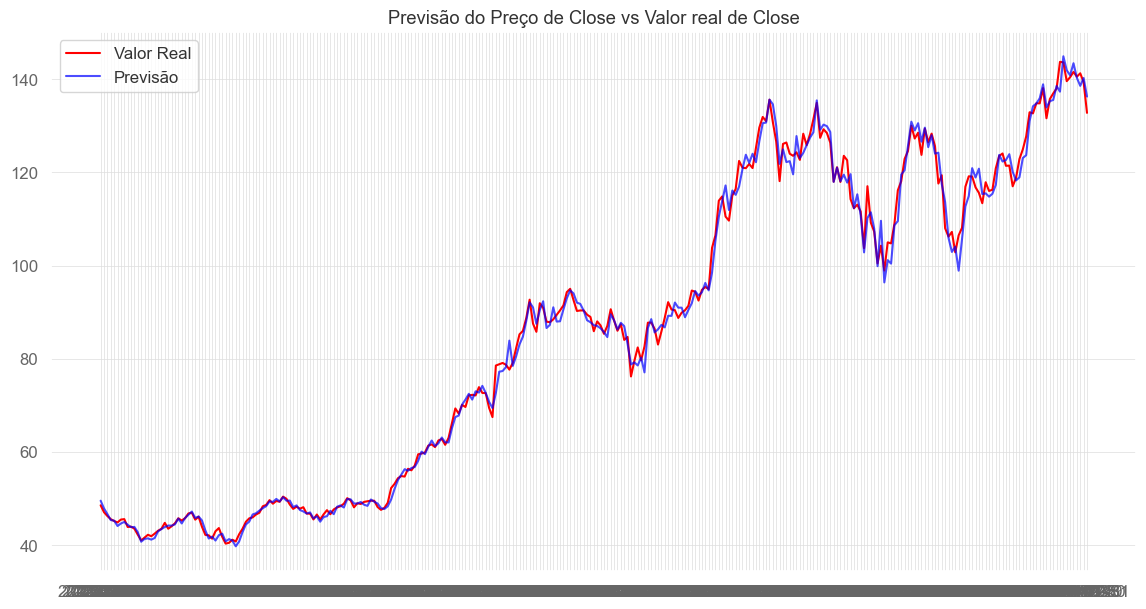

In [20]:
# https://www.simplilearn.com/tutorials/machine-learning-tutorial/stock-price-prediction-using-machine-learning

# 0. Criar as preditoras com os "lags" de returns
data_ML_Reg = data[['Close']].copy()

# 1. Pré-processamento de dados
# Criar lags (valores anteriores do preço de fechamento) para usar como preditores
data_ML_Reg['Return'] = data_ML_Reg['Close'].pct_change()
data_ML_Reg['Lag1'] = data_ML_Reg['Close'].shift(1)
data_ML_Reg['Lag2'] = data_ML_Reg['Close'].shift(2)
data_ML_Reg['Lag3'] = data_ML_Reg['Close'].shift(3)
data_ML_Reg['Lag4'] = data_ML_Reg['Close'].shift(4)
# O modelo piora quando possui a volatility e o momentum
data_ML_Reg['Volatility'] = data_ML_Reg['Return'].rolling(window=5).std()  # Desvio padrão com média móvel de 5 dias
data_ML_Reg['Momentum'] = data_ML_Reg['Close'] - data_ML_Reg['Close'].shift(5)  # Diferença de preço de 5 dias atrás

# Remover valores nulos
data_ML_Reg = data_ML_Reg.dropna()

# 2. Normalização dos dados (para redes neuronais)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data_ML_Reg[['Close']])

# Dividir os dados em variáveis preditoras (X) e alvo (y)
X = data_ML_Reg[['Lag1', 'Lag2', 'Lag3', 'Lag4', 'Volatility', 'Momentum']]
y = data_ML_Reg['Close']

# 3. Divisão em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# 4. Criar o modelo de rede neural (Keras)
model = Sequential()
model.add(Dense(units=64, activation='relu', input_dim=X_train.shape[1]))  # Camada de entrada
model.add(Dense(units=32, activation='relu'))  # Camada oculta
model.add(Dense(units=1))  # Camada de saída, uma única unidade para previsão de um valor contínuo

# Compilar o modelo
model.compile(optimizer='adam', loss='mean_squared_error')

# 5. Treinar o modelo
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# 6. Avaliar o modelo
y_pred = model.predict(X_test)

# Calcular o erro quadrático médio (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse}')

# Calcular o erro absoluto médio (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error (MAE): {mae}')

# Calcular o erro quadrático médio da raiz (RMSE)
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error (RMSE): {rmse}')

# Calcular o R² (R-squared)
r2 = r2_score(y_test, y_pred)
print(f'R-squared (R²): {r2}')

# 7. Visualizar as previsões vs. valores reais
plt.figure(figsize=(14, 7))
plt.plot(y_test.index, y_test, label='Valor Real', color='red')
plt.plot(y_test.index, y_pred, label='Previsão', color='blue', alpha=0.7)
plt.title('Previsão do Preço de Close vs Valor real de Close')
plt.legend()
plt.show()

# <a class='anchor' id='4.3'></a>

> ## **4.3 Modelo de Classificação (Machine Learning)** 

- A variável Target serão as três ações possíveis; ou seja, 1- Buy, 2- Sell, 3- Stay
- Que variáveis podem ser utilizadas para prever o Target?
- O `get_state_ML()` será obtido através do Predicted Signal?
- Fazer Backtest da estratégia

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[0]	validation_0-mlogloss:1.09726
[1]	validation_0-mlogloss:1.10340
[2]	validation_0-mlogloss:1.11024
[3]	validation_0-mlogloss:1.11602
[4]	validation_0-mlogloss:1.12393
[5]	validation_0-mlogloss:1.13235
[6]	validation_0-mlogloss:1.13217
[7]	validation_0-mlogloss:1.14071
[8]	validation_0-mlogloss:1.14229
[9]	validation_0-mlogloss:1.15747
[10]	validation_0-mlogloss:1.16140
[11]	validation_0-mlogloss:1.17098
[12]	validation_0-mlogloss:1.16253
[13]	validation_0-mlogloss:1.16647
[14]	validation_0-mlogloss:1.16841
[15]	validation_0-mlogloss:1.17460
[16]	validation_0-mlogloss:1.17250
[17]	validation_0-mlogloss:1.17289
[18]	validation_0-mlogloss:1.17446
[19]	validation_0-mlogloss:1.17800
[20]	validation_0-mlogloss:1.17931
[21]	validation_0-mlogloss:1.18186
[22]	validation_0-mlogloss:1.18712
[23]	validation_0-mlogloss:1.18884
[24]	validation_0-mlogloss:1.19476
[25]	validation_0-mlogloss:1.19962
[26]	validation_0-mlogloss:1.19897
[27

c:\Users\35196\Desktop\Otimização Mestrado\venv\lib\site-packages\xgboost\core.py:158: UserWarning:

[10:41:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[31]	validation_0-mlogloss:1.22799
[32]	validation_0-mlogloss:1.23329
[33]	validation_0-mlogloss:1.23867
[34]	validation_0-mlogloss:1.24265
[35]	validation_0-mlogloss:1.24828
[36]	validation_0-mlogloss:1.25391
[37]	validation_0-mlogloss:1.25961
[38]	validation_0-mlogloss:1.25983
[39]	validation_0-mlogloss:1.26896
[40]	validation_0-mlogloss:1.27381
[41]	validation_0-mlogloss:1.27773
[42]	validation_0-mlogloss:1.28255
[43]	validation_0-mlogloss:1.28406
[44]	validation_0-mlogloss:1.28908
[45]	validation_0-mlogloss:1.28840
[46]	validation_0-mlogloss:1.29480
[47]	validation_0-mlogloss:1.29707
[48]	validation_0-mlogloss:1.29271
[49]	validation_0-mlogloss:1.30182
[50]	validation_0-mlogloss:1.30547
[51]	validation_0-mlogloss:1.31120
[52]	validation_0-mlogloss:1.31223
[53]	validation_0-mlogloss:1.31411
[54]	validation_0-mlogloss:1.31969
[55]	validation_0-mlogloss:1.32053
[56]	validation_0-mlogloss:1.32864
[57]	validation_0-mlogloss:1.33313
[58]	validation_0-mlogloss:1.34177
[59]	validation_0-ml

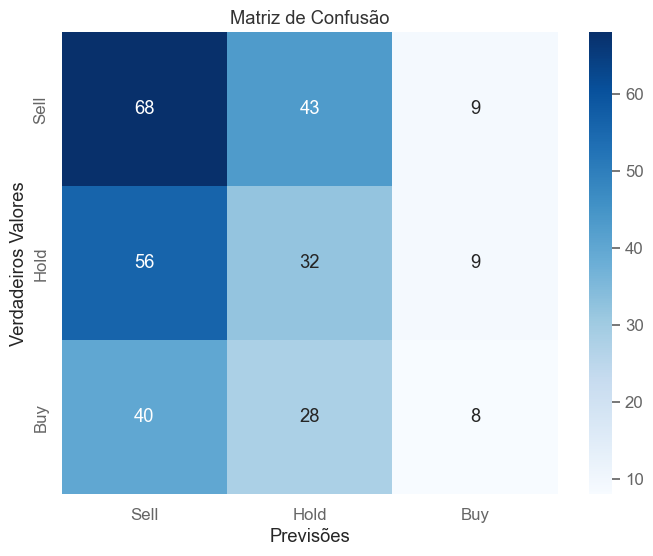

In [21]:
# 1. Pré-processamento de dados
data_ML_Cla = data[['Close']].copy()

# Quantidade de dinheiro que o modelo vai usar para investir
initial_money = 10000  # Exemplo de valor inicial (10.000 unidades monetárias)

# Criar lags (valores anteriores do preço de fechamento) para usar como preditores
data_ML_Cla['Return'] = data_ML_Cla['Close'].pct_change()
data_ML_Cla['Lag1'] = data_ML_Cla['Close'].shift(1)
data_ML_Cla['Lag2'] = data_ML_Cla['Close'].shift(2)
data_ML_Cla['Lag3'] = data_ML_Cla['Close'].shift(3)
data_ML_Cla['Lag4'] = data_ML_Cla['Close'].shift(4)
data_ML_Cla['Volatility'] = data_ML_Cla['Return'].rolling(window=5).std()  # Desvio padrão com média móvel de 5 dias
data_ML_Cla['Momentum'] = data_ML_Cla['Close'] - data_ML_Cla['Close'].shift(5)  # Diferença de preço de 5 dias atrás

# Remover valores nulos
data_ML_Cla = data_ML_Cla.dropna()

# 2. Normalização dos dados (para redes neurais)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data_ML_Cla[['Close']])

# Dividir os dados em variáveis preditoras (X) e alvo (y)
X = data_ML_Cla[['Lag1', 'Lag2', 'Lag3', 'Lag4', 'Volatility', 'Momentum']]

# Definir a variável alvo 'y' com base no comportamento futuro do preço
threshold = 0.015  # 1.5% foi o melhor valor que consegui

# Redefinir a variável alvo 'y' para uma classificação multi-classe (Buy, Hold, Sell)
y = np.where(data_ML_Cla['Close'].shift(-1) > data_ML_Cla['Close'] * (1 + threshold), 1, 0)  # Buy
y = np.where(data_ML_Cla['Close'].shift(-1) < data_ML_Cla['Close'] * (1 - threshold), 2, y)  # Sell

# Remover valores nulos criados pelo shift
data_ML_Cla = data_ML_Cla.iloc[:-1]
X = X.iloc[:-1]
y = y[:-1]

# 3. Divisão em treino e teste (usando séries temporais)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# 4. Definir a grade de parâmetros para busca aleatória
param_grid = {
    'n_estimators': [100, 200, 300],  # número de árvores
    'max_depth': [3, 5, 7],  # profundidade máxima das árvores
    'learning_rate': [0.01, 0.1, 0.2],  # taxa de aprendizado
    'subsample': [0.7, 0.8, 0.9],  # fração de amostras usadas para treinar cada árvore
    'colsample_bytree': [0.7, 0.8, 0.9]  # fração de características usadas por árvore
}

# 5. Instância do modelo XGBoost para classificação multi-classe
model_xgb = XGBClassifier(
    n_estimators=500,  # número de árvores (pode ser ajustado pelo RandomizedSearchCV)
    eval_metric='mlogloss',  # mlogloss para classificação multi-classe
    use_label_encoder=False,  # Evitar o aviso sobre o encoder de labels
    objective='multi:softmax',  # definir a tarefa como multi-classe
    num_class=3,  # número de classes (Buy, Sell, Hold)
    random_state=42
)

# 6. Definir a validação cruzada com divisões baseadas em séries temporais
tscv = TimeSeriesSplit(n_splits=5)

# 7. Buscar os melhores parâmetros usando RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=model_xgb, 
    param_distributions=param_grid, 
    n_iter=20,  # número de iterações para a busca aleatória
    cv=tscv,  # validação cruzada por séries temporais
    verbose=1, 
    n_jobs=-1, 
    random_state=42
)

# 8. Ajustar o modelo com early stopping
random_search.fit(
    X_train, 
    y_train, 
    eval_set=[(X_test, y_test)],  # conjunto de validação para early stopping
)

# Melhor modelo após a busca
best_model = random_search.best_estimator_

# Exibir os melhores hiperparâmetros encontrados
print("Melhores hiperparâmetros encontrados:", random_search.best_params_)

# 7. Avaliar o modelo
y_pred = best_model.predict(X_test)  # Predições

# 8. Avaliação e Métricas
print(f"Acurácia: {accuracy_score(y_test, y_pred)}")
print(f'Precisão: {precision_score(y_test, y_pred, average="macro")}')
print(f'Recall: {recall_score(y_test, y_pred, average="macro")}')
print(f'F1-Score: {f1_score(y_test, y_pred, average="macro")}')
print(f"Relatório de Classificação:\n{classification_report(y_test, y_pred)}")

# 9. Matriz de Confusão
conf_matrix = confusion_matrix(y_test, y_pred)

# Plotar a Matriz de Confusão
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Sell', 'Hold', 'Buy'], yticklabels=['Sell', 'Hold', 'Buy'])
plt.title('Matriz de Confusão')
plt.xlabel('Previsões')
plt.ylabel('Verdadeiros Valores')
plt.show()

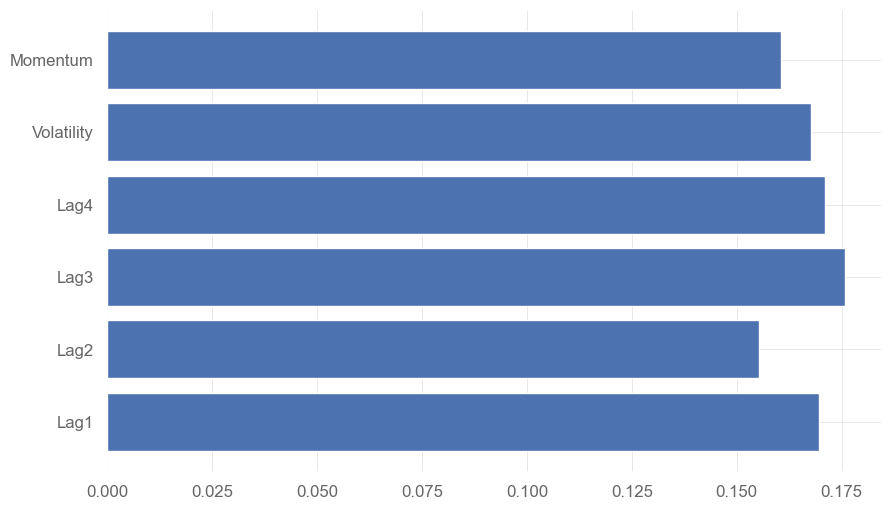

In [22]:
importances = best_model.feature_importances_
feature_names = X.columns
plt.barh(feature_names, importances)
plt.show()

In [23]:
# 9. Simular estratégia de investimento
def simulate_trading(initial_money, data, predictions, test_indices):
    money = initial_money
    shares = 0

    for i in range(1, len(test_indices)):
        idx = test_indices[i]  # Usamos os índices diretamente
        
        # Sinal de compra: comprar o máximo de ações possível
        if predictions[i] == 1 and money > 0:  # 1 é para Buy
            current_price = data.iloc[idx]['Close']
            if money >= current_price:
                num_shares_to_buy = money // current_price  # Número de ações que podem ser compradas
                shares += num_shares_to_buy
                money -= num_shares_to_buy * current_price  # Atualizar o dinheiro restante
                print(f'Comprado {num_shares_to_buy} ações a €{current_price:.20f} cada em {data.index[idx]}')
            else:
                print(f'Dinheiro insuficiente para comprar ações em {data.index[idx]} | Saldo: €{money:.5f}')

        # Sinal de venda: vender todas as ações
        elif predictions[i] == 2 and shares > 0:  # 2 é para Sell
            current_price = data.iloc[idx]['Close']
            money += shares * current_price  # Converter todas as ações em dinheiro
            print(f'Vendido {shares} ações a €{current_price:.20f} cada em {data.index[idx]}')
            shares = 0

        # Sinal de hold: nenhuma ação é tomada
        elif predictions[i] == 0:  # 0 é para Hold
            print(f'Hold em {data.index[idx]}')

    # Valor final: Dinheiro restante + valor das ações não vendidas (se existirem)
    final_money = money + (shares * data.iloc[test_indices[-1]]['Close'])
    return final_money

final_money = simulate_trading(initial_money, data_ML_Cla, y_pred, range(len(X_test)))  # Usando range para obter índices inteiros
print(f'\nValor inicial: €{int(initial_money)}')
print(f'Valor final: €{int(final_money)}')
print(f'Lucro: €{int(final_money - initial_money)}')

Hold em 2019-01-10
Hold em 2019-01-11
Comprado 2658.0 ações a €3.76099991798400878906 cada em 2019-01-14
Dinheiro insuficiente para comprar ações em 2019-01-15 | Saldo: €3.26222
Dinheiro insuficiente para comprar ações em 2019-01-16 | Saldo: €3.26222
Dinheiro insuficiente para comprar ações em 2019-01-17 | Saldo: €3.26222
Hold em 2019-01-18
Hold em 2019-01-22
Hold em 2019-01-23
Hold em 2019-01-24
Vendido 2658.0 ações a €4.00374984741210937500 cada em 2019-01-25
Comprado 3085.0 ações a €3.45024991035461425781 cada em 2019-01-28
Dinheiro insuficiente para comprar ações em 2019-01-29 | Saldo: €1.20834
Dinheiro insuficiente para comprar ações em 2019-01-30 | Saldo: €1.20834
Hold em 2019-01-31
Hold em 2019-02-01
Hold em 2019-02-04
Hold em 2019-02-05
Hold em 2019-02-06
Dinheiro insuficiente para comprar ações em 2019-02-07 | Saldo: €1.20834
Dinheiro insuficiente para comprar ações em 2019-02-08 | Saldo: €1.20834
Dinheiro insuficiente para comprar ações em 2019-02-11 | Saldo: €1.20834
Dinheir

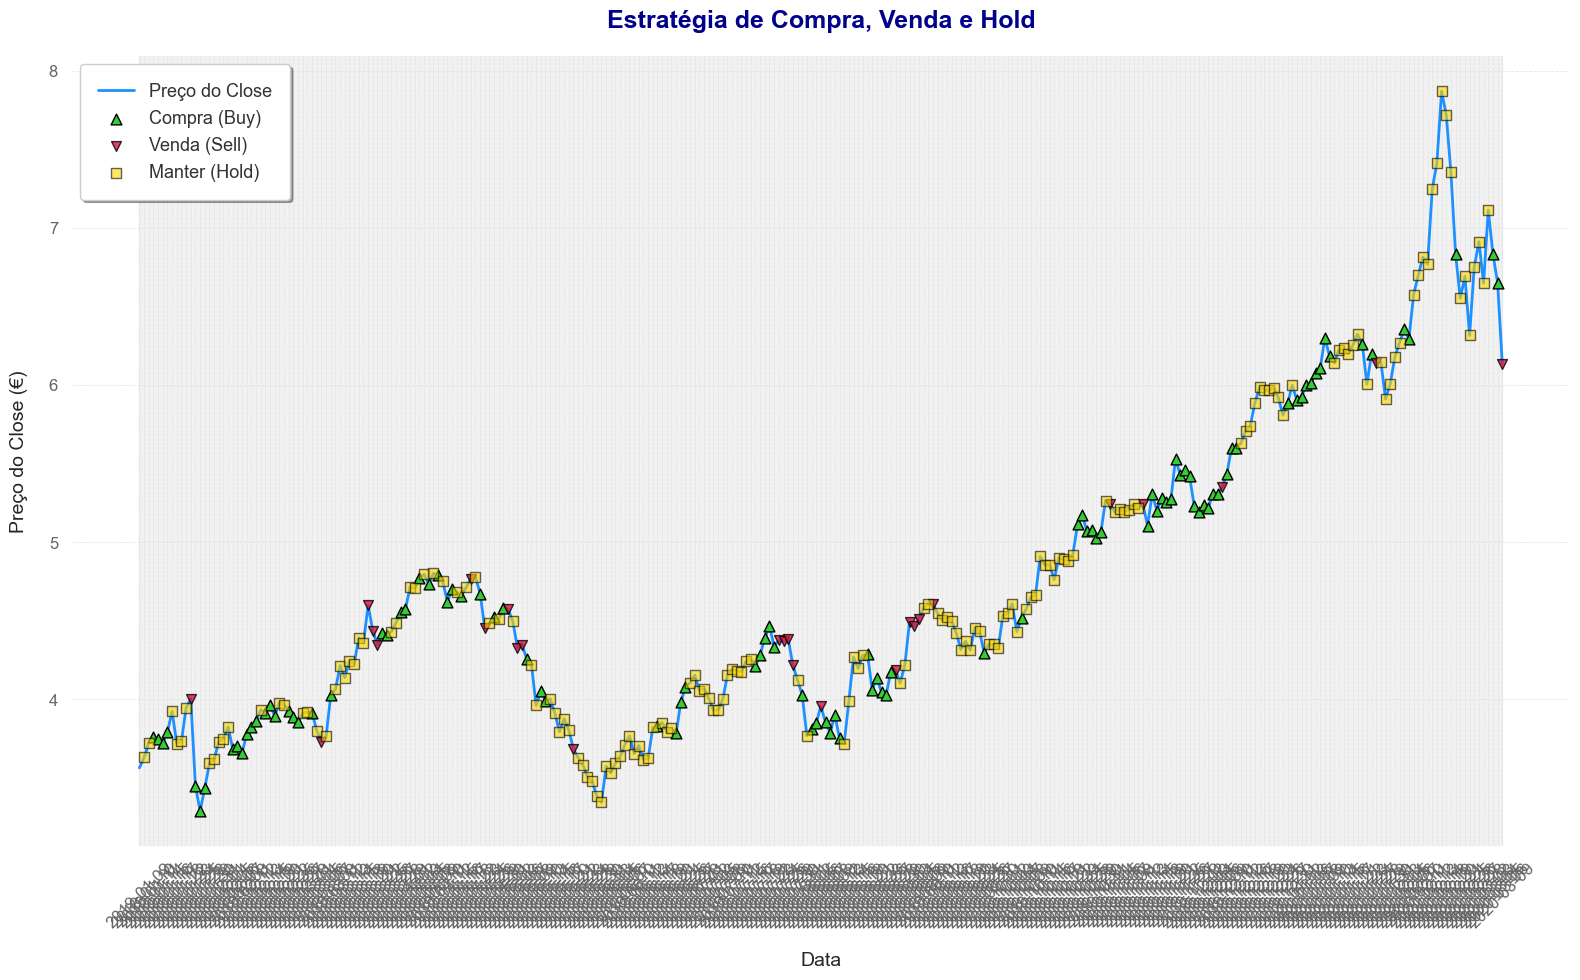

In [24]:
def plot_trading_strategy(data, predictions, test_indices):
    # Criar listas para guardar os índices de compra, venda e hold
    buy_signals = []
    sell_signals = []
    hold_signals = []

    for i in range(1, len(test_indices)):
        idx = test_indices[i]  # Obter o índice
        if predictions[i] == 1:  # Sinal de compra (Buy)
            buy_signals.append(idx)
        elif predictions[i] == 2:  # Sinal de venda (Sell)
            sell_signals.append(idx)
        elif predictions[i] == 0:  # Sinal de hold (Hold)
            hold_signals.append(idx)

    # Criar o gráfico
    plt.figure(figsize=(16, 10))
    plt.plot(data.index[test_indices], data['Close'].iloc[test_indices], label='Preço do Close', color='dodgerblue', lw=2, zorder=1)

    # Adicionar pontos de compra (verde), venda (vermelho) e hold (cinza) com zorder maior
    plt.scatter(data.index[buy_signals], data['Close'].iloc[buy_signals], 
                color='limegreen', label='Compra (Buy)', marker='^', edgecolor='black', s=60, alpha=1, zorder=2)
    plt.scatter(data.index[sell_signals], data['Close'].iloc[sell_signals], 
                color='crimson', label='Venda (Sell)', marker='v', edgecolor='black', s=50, alpha=0.8, zorder=3)
    plt.scatter(data.index[hold_signals], data['Close'].iloc[hold_signals], 
                color='gold', label='Manter (Hold)', marker='s', edgecolor='black', s=50, alpha=0.6, zorder=4)

    # Melhorias no gráfico
    plt.title('Estratégia de Compra, Venda e Hold', fontsize=18, weight='bold', pad=20, color='darkblue')
    plt.xlabel('Data', fontsize=14, labelpad=15)
    plt.ylabel('Preço do Close (€)', fontsize=14, labelpad=15)
    plt.xticks(fontsize=12, rotation=45)
    plt.yticks(fontsize=12)
    plt.legend(fontsize=13, loc='upper left', frameon=True, fancybox=True, shadow=True, borderpad=1)
    plt.grid(True, linestyle='--', linewidth=0.6, alpha=0.7)

    # Adicionar área de fundo para destacar o período de teste
    plt.axvspan(data.index[test_indices[0]], data.index[test_indices[-1]], color='lightgray', alpha=0.3, label='Período de Teste', zorder=0)

    # Mostrar o gráfico
    plt.tight_layout()
    plt.show()

# Chamar a função com os dados de teste
plot_trading_strategy(data_ML_Cla, y_pred, range(len(X_test)))

# <a class='anchor' id='5'></a>

> # **5. Algoritmo de Reinforcement Learning de Trading** 

# <a class='anchor' id='5.1'></a>

> ## **5.1 Definição do environment**

- $a_t$ ("action"): Ação que o agente toma em um estado $s_t$.

    `num_actions` = 3 (três ações possíveis):
    - 0 = Hold: Manter a posição atual, sem realizar nenhuma operação.
    - 1 = Buy: Comprar o ativo.
    - 2 = Sell: Vender o ativo.

- $s_t$ ("state"): Representa a condição atual do mercado, baseado nas estratégias estatísticas de trading.

    A função get_state_exponential() retorna um estado, que é um número inteiro, da combinação das EMAs (50,140) (Exponential Moving Averages):
    - $ "int"(\text{EMA}{\text{fast}} \times 10 + \text{EMA}{\text{slow}} \times 10)$.
    
    A função de discretização do estado pode ser implementada através de um crossover entre duas EMAs.
- `q-table`: Matriz de valores Q inicializada com zeros.

    Dimensões: `num_states` = 100 x `num_actions` = 3.
    
    O algoritmo Q-Learning irá preencher a tabela com os valores que representam a expectativa de recompensa de cada ação em determinado estado.

**Parâmetros do Algoritmo:**

- $\alpha$ ("alpha"): Taxa de aprendizagem.
    Controla o equilíbrio entre velocidade e estabilidade do aprendizado. Valor inicial: 0.1
- $\gamma$ ("gamma"): Fator de desconto.
    Controla a importância das recompensas futuras em relação às recompensas imediatas. Valor inicial: 0.95
- $\epsilon$ ("epsilon"): Taxa de exploração.
    Controla o quanto o agente explora aleatoriamente as ações disponíveis. Inicializado em 1.0 (total exploração no início).

    Ao longo do tempo, diminui conforme o agente torna-se mais confiante. Controlado pela taxa de `epsilon_decay` com valor inicial de 0.995.
- $r_t$ ("reward"): Recompensa que o agente recebe baseado no desempenho.

    - 1º Caso: Recompensa calculada no momento da venda, refletindo o lucro ou prejuízo, baseado no saldo final da transação;
    - 2º Caso: Recompensa calculada com base no Sharpe Ratio, com o objetivo de maximizar lucros e minimizar riscos.


Variáveis Importantes:

- `initial_balance`: Valor inicial da carteira, definido como $1000.
- `balance`: Valor da carteira do agente durante o treino, sendo igual ao `initial_balance` a cada início de episódio.
- `position`: Indica se o agente está **sem** ativos na sua posse (0) ou **com** (1). Inicializado como 0 (sem ativos).
- `transaction_fee`: Taxa de transação aplicada a cada operação (compra ou venda). Definida como 0.001, representando uma taxa de 0.1% sobre cada transação.

In [25]:
data['EMA_50'] = data['Close'].ewm(span=50, adjust=False).mean()
data['EMA_140'] = data['Close'].ewm(span=140, adjust=False).mean()
# data['SMA_10'] = data['Close'].rolling(window=10).mean() # testes
# data['SMA_50'] = data['Close'].rolling(window=50).mean() # testes
prices = data['Close'].values

# scale the 3 variables above
scaler = MinMaxScaler()
data[['Close', 'EMA_50', 'EMA_140']] = scaler.fit_transform(data[['Close', 'EMA_50', 'EMA_140']])
data.dropna(inplace=True)
data

,Adj Close,Close,High,Low,Open,Volume,EMA_50,EMA_140
Date,,,,,,,,
2019-01-02,3.37809014320373535156,0.00146430583282394777,3.46199989318847656250,3.25125002861022949219,3.26600003242492675781,508752000,0.00006462065694710570,0.00002641459074890704
2019-01-03,3.17399573326110839844,0.00000000000000000000,3.37899994850158691406,3.19225001335144042969,3.34474992752075195312,705552000,0.00000000000000000000,0.00000000000000000000
2019-01-04,3.37734627723693847656,0.00145896937946797534,3.44324994087219238281,3.24250006675720214844,3.27349996566772460938,585620000,0.00000229864265984675,0.00000027841084479160
2019-01-07,3.55614542961120605469,0.00274179337805085729,3.62225008010864257812,3.41074991226196289062,3.46250009536743164062,709160000,0.00006111890189767696,0.00002369371528822620
2019-01-08,3.46761322021484375000,0.00210660780660988992,3.66950011253356933594,3.42249989509582519531,3.66724991798400878906,786016000,0.00008960138042410359,0.00003531878484714854
...,...,...,...,...,...,...,...,...
2024-10-25,141.53024291992187500000,0.98455619199864852220,144.13000488281250000000,140.80000305175781250000,140.92999267578125000000,205122100,0.98598876150881276104,0.98694141462962359235
2024-10-28,140.51031494140625000000,0.97729701365011489855,143.13999938964843750000,140.05000305175781250000,143.00000000000000000000,173586700,0.99038912725667072046,0.99054565174516406856
2024-10-29,141.24026489257812500000,0.98249233351027398520,142.25999450683593750000,138.89999389648437500000,140.28999328613281250000,157593600,0.99484620208952700970,0.99419248322628872572


In [26]:
# Define Q-learning parameters
num_states = 100  # Discretize state space
num_actions = 3  # 0 = Hold, 1 = Buy, 2 = Sell
q_table = np.zeros((num_states, num_actions))
alpha = 0.1  # Learning rate
gamma = 0.95  # Discount factor
epsilon = 1.0  # Exploration rate
epsilon_decay = 0.995
min_epsilon = 0.01

# Discretize states
def get_state_exponencial(row):
    '''
    return do int que tem os valores de EMA_10 e EMA_50 multiplicados por 10 (multiplicados por 10 porque é da escala)
    '''
    state = int(row['EMA_50'] * 10 + row['EMA_140'] * 10)
    return state

'''
def get_state(row):
    return int(row['SMA_10'] * 10 + row['SMA_50'] * 10)
'''

data['State'] = data.apply(get_state_exponencial, axis=1).astype(int)

# Initialize variables
initial_balance = 1000
balance = initial_balance
position = 0  # 1 if holding the currency, 0 otherwise
transaction_fee = 0.001  # 0.1% fee

In [27]:
data

,Adj Close,Close,High,Low,Open,Volume,EMA_50,EMA_140,State
Date,,,,,,,,,
2019-01-02,3.37809014320373535156,0.00146430583282394777,3.46199989318847656250,3.25125002861022949219,3.26600003242492675781,508752000,0.00006462065694710570,0.00002641459074890704,0
2019-01-03,3.17399573326110839844,0.00000000000000000000,3.37899994850158691406,3.19225001335144042969,3.34474992752075195312,705552000,0.00000000000000000000,0.00000000000000000000,0
2019-01-04,3.37734627723693847656,0.00145896937946797534,3.44324994087219238281,3.24250006675720214844,3.27349996566772460938,585620000,0.00000229864265984675,0.00000027841084479160,0
2019-01-07,3.55614542961120605469,0.00274179337805085729,3.62225008010864257812,3.41074991226196289062,3.46250009536743164062,709160000,0.00006111890189767696,0.00002369371528822620,0
2019-01-08,3.46761322021484375000,0.00210660780660988992,3.66950011253356933594,3.42249989509582519531,3.66724991798400878906,786016000,0.00008960138042410359,0.00003531878484714854,0
...,...,...,...,...,...,...,...,...,...
2024-10-25,141.53024291992187500000,0.98455619199864852220,144.13000488281250000000,140.80000305175781250000,140.92999267578125000000,205122100,0.98598876150881276104,0.98694141462962359235,19
2024-10-28,140.51031494140625000000,0.97729701365011489855,143.13999938964843750000,140.05000305175781250000,143.00000000000000000000,173586700,0.99038912725667072046,0.99054565174516406856,19
2024-10-29,141.24026489257812500000,0.98249233351027398520,142.25999450683593750000,138.89999389648437500000,140.28999328613281250000,157593600,0.99484620208952700970,0.99419248322628872572,19


# <a class='anchor' id='5.2'></a>

> ## **5.2 Algoritmos de Q-learning:**

# <a class='anchor' id='5.2.1'></a>

> ## **5.2.1 Algoritmo 1**

- Escolha do estado: $int(\text{EMA}(50)\times 10 + \text{EMA}(140)\times 10)$;
- Reward: o balanço atual - inicial;

In [35]:
# Training
for episode in tqdm(range(500), # Train for 500 episodes
                    desc="Training Agent", 
                    bar_format='{l_bar}{bar}| {n_fmt}/{total_fmt} [{elapsed}<{remaining}{postfix}]', 
                    colour='green', ncols=80):  
    
    balance = initial_balance
    position = 0
    for t in range(len(data) - 1):
        state = data.iloc[t]['State']
        state = int(state) # TODO: ver se é preciso // VERSÃO IMPORVISADA
        if np.random.rand() < epsilon:
            action = np.random.choice(num_actions)  # Explore
        else:
            action = np.argmax(q_table[state])  # Exploit

        # Take action
        next_state = data.iloc[t + 1]['State']
        next_state = int(next_state) # TODO: ver se é preciso // VERSÃO IMPORVISADA
        reward = 0
        if action == 1:  # Buy
            if position == 0:
                position = balance / prices[t]  # Buy currency
                balance -= position * prices[t] * (1 + transaction_fee)
        elif action == 2:  # Sell
            if position > 0:
                balance += position * prices[t] * (1 - transaction_fee)  # Sell currency
                position = 0
                reward = balance - initial_balance  # Profit or loss
        else:  # Hold
            reward = 0

        # Update Q-table
        q_table[state, action] += alpha * (
            reward + gamma * np.max(q_table[next_state]) - q_table[state, action]
        )

    # Decay epsilon
    epsilon = max(min_epsilon, epsilon * epsilon_decay)


Training Agent: 100%|████████████████████████████████████| 500/500 [01:28<00:00]


Q-table: [[  0.88663735   6.42874552 -11.92257132]
 [ 43.64702752  11.36035856  98.97688555]
 [ 29.90805384  12.17918621  80.20470244]
 [107.3859918  101.72458323 205.68338038]
 [221.3004063  224.93666483 392.89801936]
 [167.87752505 167.89956058 413.61924169]
 [190.2025705  182.01698975 233.11712193]
 [256.8422781  256.78612271 444.73550964]
 [307.20917458 307.23693695 461.0834912 ]
 [310.45370253 310.78901124 359.74546019]
 [287.98043177 306.84766277 572.67645716]
 [272.82702069 272.63787984 450.91772931]
 [258.81444871 258.47476049 514.02241213]
 [301.87225827 302.87152707 535.78746863]
 [264.90643278 264.76262727 268.33517319]
 [219.85202941 220.11001936 220.79912744]
 [165.18416233 161.77459679 162.31597411]
 [129.9944844  130.27151661 273.0943647 ]
 [ 73.9310272   87.29096811 317.2091663 ]
 [ 17.0683743    5.81570498  63.77814328]
 [  0.           0.           0.        ]
 [  0.           0.           0.        ]
 [  0.           0.           0.        ]
 [  0.           0.      

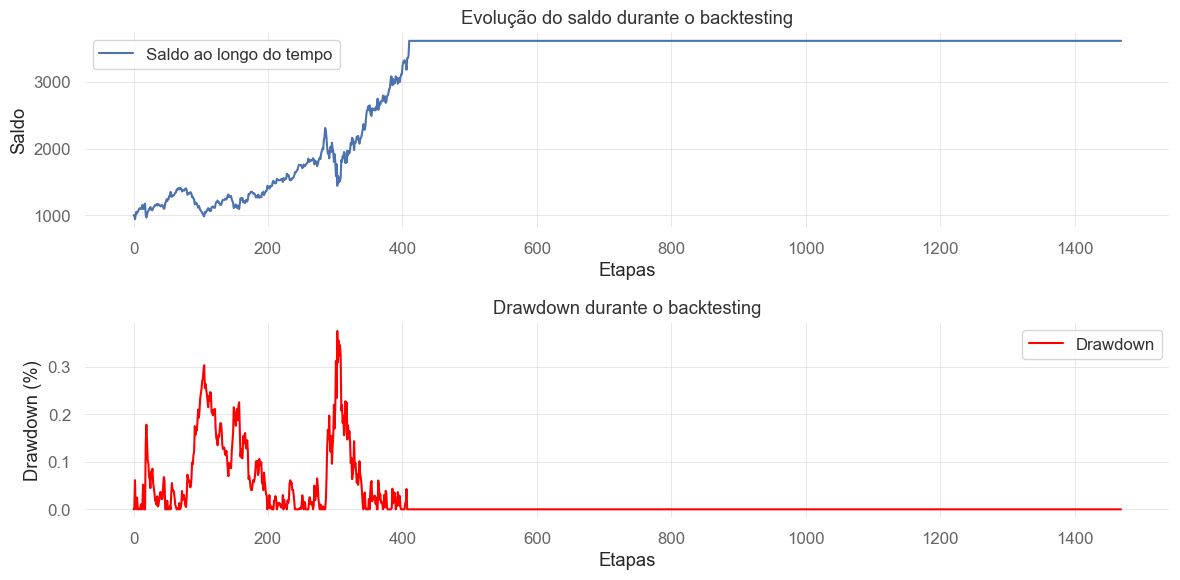

In [ ]:
def max_drawdown(account_values):
    returns = account_values.diff(1) / account_values[:-1]  
    cumulative = (returns + 1).cumprod() 
    peak = cumulative.expanding(min_periods=1).max() 
    dd = (cumulative / peak) - 1  
    return dd.min() 


balance = initial_balance
position = 0
balance_over_time = [initial_balance]

# Backtesting results
for t in range(len(data) - 1):
    state = data.iloc[t]['State']

    # estado seja int e esteja nos limites
    try:
        state = int(state)
        if state < 0 or state >= num_states:
            raise ValueError(f"Estado inválido: {state}")
    except ValueError as e:
        print(e)
        balance_over_time.append(balance + (position * prices[t] if position > 0 else 0))
        continue

    action = np.argmax(q_table[state])  # política já treinada!!

    if action == 1:  # Buy
        if position == 0: 
            position = balance / prices[t] # Buy currency
            balance -= position * prices[t] * (1 + transaction_fee) 
    elif action == 2:  # Sell
        if position > 0: 
            balance += position * prices[t] * (1 - transaction_fee) # Sell currency
            position = 0
    # Adicionar o balance ao histórico (até no Hold)
    balance_over_time.append(balance + (position * prices[t] if position > 0 else 0))

# balance final (inclui posição aberta, se existir)
final_balance = balance + (position * prices[-1] if position > 0 else 0)
balance_over_time.append(final_balance)

# Q-Table
print("Q-table:", q_table)
print(f"Final balance: {final_balance}")

# ROI
roi = (final_balance - initial_balance) / initial_balance * 100
print(f"Return on Investment (ROI): {roi:.2f}%")

# Maximum Drawdown (MDD)
balance_series = pd.Series(balance_over_time) 
mdd = max_drawdown(balance_series) * 100 
print(f"Maximum Drawdown (MDD): {mdd:.2f}%")  # MAXIMUM DRAWDOWN

# Value at Risk (VaR) -> 95% confidence
daily_returns = np.diff(balance_over_time) / balance_over_time[:-1]
confidence_level = 0.95
var_95 = -np.percentile(daily_returns, 100 * (1 - confidence_level))
print(f"Value at Risk (95% confidence): {var_95:.2f}%")

#########################################

peak_balance = np.maximum.accumulate(balance_over_time)  # Pico acumulado do saldo
drawdowns = (peak_balance - balance_over_time) / peak_balance  # Drawdown relativo

'''
GRÁFICOS DE BACKTEST
'''

plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(balance_over_time, label="Saldo ao longo do tempo")
plt.title("Evolução do saldo durante o backtesting")
plt.xlabel("Etapas")
plt.ylabel("Saldo")
plt.legend()


plt.subplot(2, 1, 2)
plt.plot(drawdowns, label="Drawdown", color='red')
plt.title("Drawdown durante o backtesting")
plt.xlabel("Etapas")
plt.ylabel("Drawdown (%)")
plt.legend()


plt.tight_layout()
plt.show()


# <a class='anchor' id='5.2.2'></a>

> ## **5.2.2 Algoritmo 2**

- Escolha do estado: $int(\text{EMA}(50)\times 10 + \text{EMA}(140)\times 10)$;
- Reward: sharpe ratio;
- Hiperparâmetros mudados com os do fine-tune (secção 5.3) -> EMA(50,140);

In [46]:
num_states = 100  # Discretize state space
num_actions = 3  # 0 = Hold, 1 = Buy, 2 = Sell
q_table = np.zeros((num_states, num_actions))

##################################
## Hiperparâmetros da secção 5.3##
alpha = 0.5  # Learning rate
gamma = 0.95  # Discount factor
epsilon = 1.0  # Exploration rate
epsilon_decay = 0.99
##################################
# Initialize variables
initial_balance = 1000
balance = initial_balance
position = 0  # 1 if holding the currency, 0 otherwise
transaction_fee = 0.001  # 0.1% fee


for episode in tqdm(range(500), # Train for 500 episodes
                    desc="Training Agent", 
                    bar_format='{l_bar}{bar}| {n_fmt}/{total_fmt} [{elapsed}<{remaining}{postfix}]', 
                    colour='green', ncols=80):  
    ##############################
    cumulative_returns = []
    balance = initial_balance
    position = 0
    ##############################
    for t in range(len(data) - 1):
        state = data.iloc[t]['State']
        state = int(state)
        
        if np.random.rand() < epsilon:
            action = np.random.choice(num_actions)  # Explore
        else:
            action = np.argmax(q_table[state])  # Exploit

        # Realizar ação
        next_state = data.iloc[t + 1]['State']
        next_state = int(next_state)
        reward = 0

        if action == 1:  # Buy
            if position == 0:
                position = balance / prices[t]
                balance -= position * prices[t] * (1 + transaction_fee)
        elif action == 2:  # Sell
            if position > 0:
                balance += position * prices[t] * (1 - transaction_fee)
                transaction_return = (balance - initial_balance) / initial_balance
                cumulative_returns.append(transaction_return)
                position = 0

                # Sharpe Ratio como Reward
                if len(cumulative_returns) > 1:
                    returns = np.array(cumulative_returns)
                    avg_return = returns.mean()
                    std_return = returns.std()
                    sharpe_ratio = (avg_return - rf) / std_return if std_return > 0 else 0
                    reward = sharpe_ratio

        # Atualizar Q-table
        q_table[state, action] += alpha * (
            reward + gamma * np.max(q_table[next_state]) - q_table[state, action]
        )


Training Agent: 100%|████████████████████████████████████| 500/500 [01:48<00:00]


Q-table: [[ 8.28917724 12.04302389  8.93153366]
 [12.39247957 12.93526837 13.75077967]
 [12.49376799 13.14867212 14.22042686]
 [11.92951951 13.58178227 11.96074547]
 [14.49086768 15.1619946  14.96593671]
 [14.70291929 14.88387152 15.22266064]
 [13.57434604 13.41006803 13.60968395]
 [12.81219399 12.23155983 14.55131097]
 [15.38765722 14.41343442 16.31653599]
 [14.32081429 14.26980227 14.28452622]
 [11.47926006 12.04915614 12.74538429]
 [10.97057667 11.24872136 12.01224083]
 [11.29180716 11.75367486 11.57993712]
 [10.91295362 11.5695377  11.26528215]
 [12.34784923 12.59049717 13.53696883]
 [12.02094942 11.92402327 13.3871248 ]
 [12.27926377 12.14398038 13.16572129]
 [12.09397833 12.44550452 12.62582574]
 [ 8.93483662 11.57258033 12.3812457 ]
 [ 6.47832972  6.09884814  4.2028476 ]
 [ 0.          0.          0.        ]
 [ 0.          0.          0.        ]
 [ 0.          0.          0.        ]
 [ 0.          0.          0.        ]
 [ 0.          0.          0.        ]
 [ 0.          0

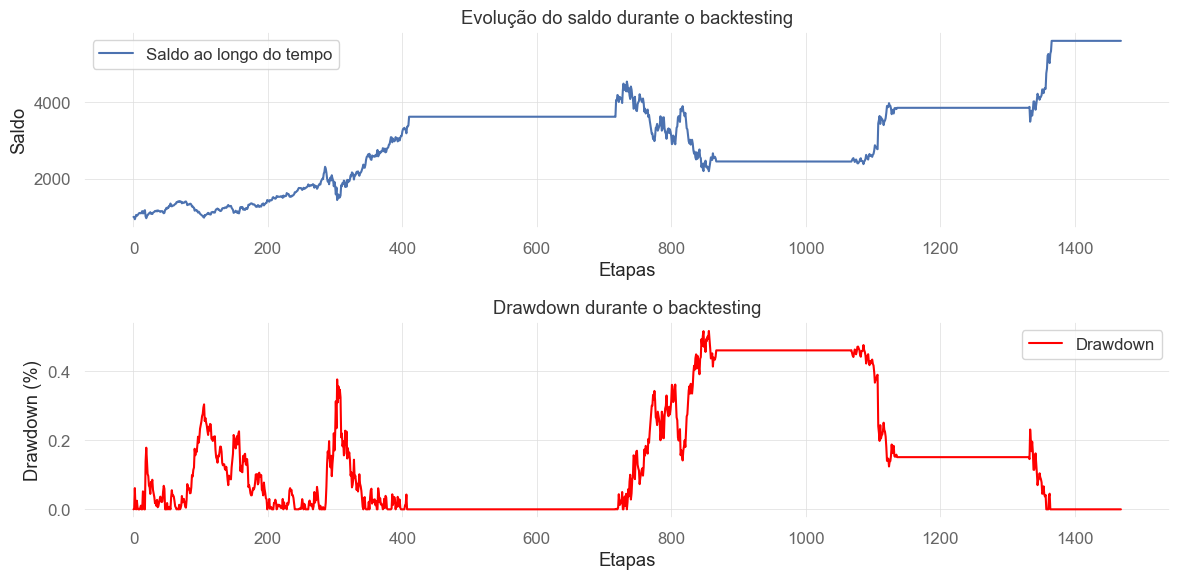

In [ ]:
def max_drawdown(account_values):
    returns = account_values.diff(1) / account_values[:-1]  
    cumulative = (returns + 1).cumprod() 
    peak = cumulative.expanding(min_periods=1).max() 
    dd = (cumulative / peak) - 1  
    return dd.min() 


balance = initial_balance
position = 0
balance_over_time = [initial_balance]

# Backtesting results
for t in range(len(data) - 1):
    state = data.iloc[t]['State']

    # estado seja int e esteja nos limites
    try:
        state = int(state)
        if state < 0 or state >= num_states:
            raise ValueError(f"Estado inválido: {state}")
    except ValueError as e:
        print(e)
        balance_over_time.append(balance + (position * prices[t] if position > 0 else 0))
        continue

    action = np.argmax(q_table[state])  # política já treinada!!

    if action == 1:  # Buy
        if position == 0: 
            position = balance / prices[t] # Buy currency
            balance -= position * prices[t] * (1 + transaction_fee) 
    elif action == 2:  # Sell
        if position > 0: 
            balance += position * prices[t] * (1 - transaction_fee) # Sell currency
            position = 0
    # Adicionar o balance ao histórico (até no Hold)
    balance_over_time.append(balance + (position * prices[t] if position > 0 else 0))

# balance final (inclui posição aberta, se existir)
final_balance = balance + (position * prices[-1] if position > 0 else 0)
balance_over_time.append(final_balance)

# Q-Table
print("Q-table:", q_table)
print(f"Final balance: {final_balance}")

# ROI
roi = (final_balance - initial_balance) / initial_balance * 100
print(f"Return on Investment (ROI): {roi:.2f}%")

# Maximum Drawdown (MDD)
balance_series = pd.Series(balance_over_time) 
mdd = max_drawdown(balance_series) * 100 
print(f"Maximum Drawdown (MDD): {mdd:.2f}%")  # MAXIMUM DRAWDOWN

# Value at Risk (VaR) -> 95% confidence
daily_returns = np.diff(balance_over_time) / balance_over_time[:-1]
confidence_level = 0.95
var_95 = -np.percentile(daily_returns, 100 * (1 - confidence_level))
print(f"Value at Risk (95% confidence): {var_95:.2f}%")

#########################################

peak_balance = np.maximum.accumulate(balance_over_time)  # Pico acumulado do saldo
drawdowns = (peak_balance - balance_over_time) / peak_balance  # Drawdown relativo

'''
GRÁFICOS DE BACKTEST
'''

plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(balance_over_time, label="Saldo ao longo do tempo")
plt.title("Evolução do saldo durante o backtesting")
plt.xlabel("Etapas")
plt.ylabel("Saldo")
plt.legend()


plt.subplot(2, 1, 2)
plt.plot(drawdowns, label="Drawdown", color='red')
plt.title("Drawdown durante o backtesting")
plt.xlabel("Etapas")
plt.ylabel("Drawdown (%)")
plt.legend()


plt.tight_layout()
plt.show()

# <a class='anchor' id='5.3'></a>

> ## **5.3 Fine-Tune Algoritmos**

```python
# "Grid Search" para hiperparâmetros
alpha_space = [0.1, 0.2, 0.5]         # Taxa de aprendizagem
gamma_space = [0.9, 0.95, 0.99]       # Fator de desconto
epsilon_space = [1.0, 0.7, 0.5]       # Taxa inicial de exploração
epsilon_decay_space = [0.995, 0.99]   # Decaimento de exploração

# all combinations itertools
param_combinations = list(product(alpha_space, gamma_space, epsilon_space, epsilon_decay_space))

grid_search_results = []

for alpha, gamma, epsilon, epsilon_decay in tqdm(param_combinations, desc="Grid Search"):
    # Inicializa Q-Table e outras variáveis
    q_table = np.zeros((num_states, num_actions))
    epsilon_value = epsilon

    # Treinamento
    for episode in range(200): 
        balance = initial_balance
        position = 0
        cumulative_returns = []
        
        for t in range(len(data) - 1):
            state = int(data.iloc[t]['State'])
            action = np.random.choice(num_actions) if np.random.rand() < epsilon_value else np.argmax(q_table[state])
            
            next_state = int(data.iloc[t + 1]['State'])
            reward = 0
            # Executa ações: comprar, vender ou manter
            if action == 1:  # Buy
                if position == 0:
                    position = balance / prices[t]
                    balance -= position * prices[t] * (1 + transaction_fee)
            elif action == 2:  # Sell
                if position > 0:
                    balance += position * prices[t] * (1 - transaction_fee)
                    transaction_return = (balance - initial_balance) / initial_balance
                    cumulative_returns.append(transaction_return)
                    position = 0
                    if len(cumulative_returns) > 1:
                        returns = np.array(cumulative_returns)
                        avg_return = returns.mean()
                        std_return = returns.std()
                        sharpe_ratio = (avg_return - rf) / std_return if std_return > 0 else 0
                        reward = sharpe_ratio
            
            # Atualiza Q-table
            q_table[state, action] += alpha * (
                reward + gamma * np.max(q_table[next_state]) - q_table[state, action]
            )
        
        
        epsilon_value = max(min_epsilon, epsilon_value * epsilon_decay)
    
    # ver por sharpe ratio
    final_balance = balance + (position * prices[-1] if position > 0 else 0)
    sharpe_ratio = (np.mean(cumulative_returns) - rf) / np.std(cumulative_returns) if len(cumulative_returns) > 1 else 0
    
    grid_search_results.append((alpha, gamma, epsilon, epsilon_decay, final_balance, sharpe_ratio))

# Ordenar resultados por Sharpe Ratio
grid_search_results = sorted(grid_search_results, key=lambda x: x[5], reverse=True)

# top 5 melhores
print("Top 5 Configurações de Hiperparâmetros:")
for result in grid_search_results[:5]:
    print(f"Alpha: {result[0]}, Gamma: {result[1]}, Epsilon: {result[2]}, Epsilon Decay: {result[3]}, Final Balance: {result[4]:.2f}, Sharpe Ratio: {result[5]:.2f}")
```

--------------------------------------------------------------------------------------------------------------------
#### EMA(fast,slow) = (10,70)

Grid Search: 100%|██████████| 36/36 [18:00<00:00, 30.02s/it]

```
alpha_space = [0.1, 0.2, 0.5]         # Taxa de aprendizagem
gamma_space = [0.9, 0.95, 0.99]       # Fator de desconto
epsilon_space = [1.0, 0.5]            # Taxa inicial de exploração
epsilon_decay_space = [0.995, 0.99]   # Decaimento de exploração
```


Top 5 Configurações de Hiperparâmetros:

- Alpha: 0.1, Gamma: 0.99, Epsilon: 0.5, Epsilon Decay: 0.99, Final Balance: 1515.50, Sharpe Ratio: 3.37
- Alpha: 0.2, Gamma: 0.9, Epsilon: 0.5, Epsilon Decay: 0.99, Final Balance: 2335.11, Sharpe Ratio: 2.27
- Alpha: 0.1, Gamma: 0.9, Epsilon: 0.5, Epsilon Decay: 0.99, Final Balance: 1267.52, Sharpe Ratio: 2.26
- Alpha: 0.5, Gamma: 0.9, Epsilon: 0.5, Epsilon Decay: 0.99, Final Balance: 2405.73, Sharpe Ratio: 2.09
- Alpha: 0.2, Gamma: 0.95, Epsilon: 0.5, Epsilon Decay: 0.99, Final Balance: 1396.41, Sharpe Ratio: 2.03

--------------------------------------------------------------------------------------------------------------------

--------------------------------------------------------------------------------------------------------------------
#### EMA(fast,slow) = (50,200)

Grid Search: 100%|██████████| 54/54 [35:58<00:00, 39.97s/it] 

```
alpha_space = [0.1, 0.2, 0.5]         # Taxa de aprendizagem
gamma_space = [0.9, 0.95, 0.99]       # Fator de desconto
epsilon_space = [1.0, 0.7, 0.5]       # Taxa inicial de exploração
epsilon_decay_space = [0.995, 0.99]   # Decaimento de exploração
```


Top 5 Configurações de Hiperparâmetros:

- Alpha: 0.5, Gamma: 0.95, Epsilon: 1.0, Epsilon Decay: 0.99, Final Balance: 2257.21, Sharpe Ratio: 4.07
- Alpha: 0.5, Gamma: 0.99, Epsilon: 0.5, Epsilon Decay: 0.99, Final Balance: 1730.85, Sharpe Ratio: 3.52
- Alpha: 0.2, Gamma: 0.99, Epsilon: 0.5, Epsilon Decay: 0.995, Final Balance: 1266.84, Sharpe Ratio: 3.33
- Alpha: 0.2, Gamma: 0.99, Epsilon: 0.5, Epsilon Decay: 0.99, Final Balance: 1423.31, Sharpe Ratio: 3.18
- Alpha: 0.1, Gamma: 0.99, Epsilon: 0.7, Epsilon Decay: 0.995, Final Balance: 1689.74, Sharpe Ratio: 3.11

--------------------------------------------------------------------------------------------------------------------

Será executado com Random Search agora para ser mais rápido e otimizado.

In [51]:
# Definir o intervalo para os hiperparâmetros
alpha_space = [0.1, 0.2, 0.5]         # Taxa de aprendizagem
gamma_space = [0.9, 0.95, 0.99]       # Fator de desconto
epsilon_space = [1.0, 0.7, 0.5]       # Taxa inicial de exploração
epsilon_decay_space = [0.995, 0.99]   # Decaimento de exploração

# Número de amostras de Random Search
num_random_search = 10  # Ajuste o número de amostras a serem testadas

grid_search_results = []

for _ in tqdm(range(num_random_search), desc="Random Search"):
    # Escolher aleatoriamente os hiperparâmetros
    alpha = random.choice(alpha_space)
    gamma = random.choice(gamma_space)
    epsilon = random.choice(epsilon_space)
    epsilon_decay = random.choice(epsilon_decay_space)
    
    # q-Table e outras variáveis
    q_table = np.zeros((num_states, num_actions))
    initial_balance = 1000
    epsilon_value = epsilon

    # training 
    for episode in range(200): 
        balance = initial_balance
        position = 0
        cumulative_returns = []
        
        for t in range(len(data) - 1):
            state = int(data.iloc[t]['State'])
            action = np.random.choice(num_actions) if np.random.rand() < epsilon_value else np.argmax(q_table[state])
            
            next_state = int(data.iloc[t + 1]['State'])
            reward = 0
            # Executa ações: comprar, vender ou manter
            if action == 1:  # Buy
                if position == 0:
                    position = balance / prices[t]
                    balance -= position * prices[t] * (1 + transaction_fee)
            elif action == 2:  # Sell
                if position > 0:
                    balance += position * prices[t] * (1 - transaction_fee)
                    transaction_return = (balance - initial_balance) / initial_balance
                    cumulative_returns.append(transaction_return)
                    position = 0
                    if len(cumulative_returns) > 1:
                        returns = np.array(cumulative_returns)
                        avg_return = returns.mean()
                        std_return = returns.std()
                        sharpe_ratio = (avg_return - rf) / std_return if std_return > 0 else 0
                        reward = sharpe_ratio
            
            # Atualiza Q-table
            q_table[state, action] += alpha * (
                reward + gamma * np.max(q_table[next_state]) - q_table[state, action]
            )
        
        # Atualização de epsilon conforme o decay
        epsilon_value = max(min_epsilon, epsilon_value * epsilon_decay)
    
    # Calcular o Sharpe Ratio e o saldo final
    final_balance = balance + (position * prices[-1] if position > 0 else 0)
    sharpe_ratio = (np.mean(cumulative_returns) - rf) / np.std(cumulative_returns) if len(cumulative_returns) > 1 else 0
    
    grid_search_results.append((alpha, gamma, epsilon, epsilon_decay, final_balance, sharpe_ratio))

# Ordenar resultados por Sharpe Ratio
grid_search_results = sorted(grid_search_results, key=lambda x: x[5], reverse=True)

# Top 5 melhores resultados
print("Top 5 Configurações de Hiperparâmetros (Random Search):")
for result in grid_search_results[:5]:
    print(f"Alpha: {result[0]}, Gamma: {result[1]}, Epsilon: {result[2]}, Epsilon Decay: {result[3]}, Final Balance: {result[4]:.2f}, Sharpe Ratio: {result[5]:.2f}")

Random Search: 100%|██████████| 10/10 [06:15<00:00, 37.53s/it]

Top 5 Configurações de Hiperparâmetros (Random Search):
Alpha: 0.2, Gamma: 0.9, Epsilon: 0.5, Epsilon Decay: 0.99, Final Balance: 1855.64, Sharpe Ratio: 2.59
Alpha: 0.2, Gamma: 0.95, Epsilon: 0.5, Epsilon Decay: 0.99, Final Balance: 1534.04, Sharpe Ratio: 2.10
Alpha: 0.5, Gamma: 0.9, Epsilon: 1.0, Epsilon Decay: 0.995, Final Balance: 1404.47, Sharpe Ratio: 1.95
Alpha: 0.5, Gamma: 0.99, Epsilon: 1.0, Epsilon Decay: 0.995, Final Balance: 3026.22, Sharpe Ratio: 1.55
Alpha: 0.5, Gamma: 0.99, Epsilon: 0.5, Epsilon Decay: 0.995, Final Balance: 1270.95, Sharpe Ratio: 1.39
